In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [18]:
#pulling csv file
#reading csv file
nyc_df = pd.read_csv('Airbnb Data/AB_NYC_2019.csv')

#find the variable data types
nyc_df = nyc_df.dropna() #drop any null values
nyc_df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
id                                38821 non-null int64
name                              38821 non-null object
host_id                           38821 non-null int64
host_name                         38821 non-null object
neighbourhood_group               38821 non-null object
neighbourhood                     38821 non-null object
latitude                          38821 non-null float64
longitude                         38821 non-null float64
room_type                         38821 non-null object
price                             38821 non-null int64
minimum_nights                    38821 non-null int64
number_of_reviews                 38821 non-null int64
last_review                       38821 non-null object
reviews_per_month                 38821 non-null float64
calculated_host_listings_count    38821 non-null int64
availability_365                  38821 non-null int64

# First Chart (Change after creation)

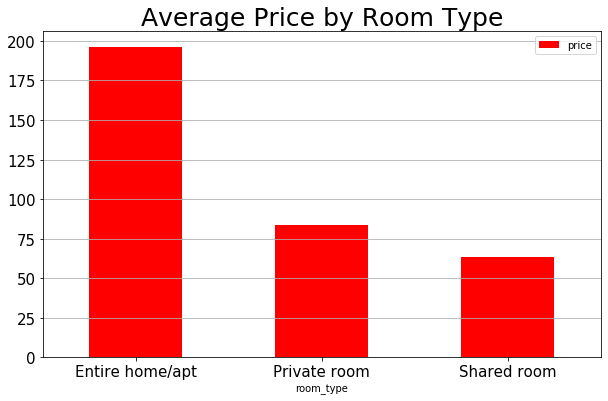

In [49]:
#Groupby Room Types
rm_type = nyc_df.groupby(['room_type'])
room_mean = pd.DataFrame(rm_type['price'].mean())
room_mean

#plot bar chart
room_mean.plot(kind="bar",figsize=(10,6), color='red')

#format charts
plt.title('Average Price by Room Type',size = 25)
plt.yticks(size=15)
plt.xticks(rotation='horizontal',size=15)
plt.grid(axis='y')


In [50]:
#plot average price in neighborhoods
n_type = nyc_df.groupby(['neighbourhood'])
neighbor_mean = pd.DataFrame(n_type['price'].mean())
neighbor_mean

,price
neighbourhood,
Allerton,90.594595
Arden Heights,67.250000
Arrochar,118.250000
Arverne,158.515152
Astoria,116.018336
Bath Beach,84.800000
Battery Park City,182.194444
Bay Ridge,105.373913
Bay Terrace,118.800000
